In [1]:
# pip install pandas


In [2]:

import pandas as pd
df = pd.read_csv('flaml_data/data.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


In [3]:
X = df.drop('logS', axis = 1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [4]:
y = df.logS
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((915, 4), (915,))

In [6]:
from flaml import AutoML
automl = AutoML()
automl.fit(X_train, y_train, task="regression", time_budget = 60)

[flaml.automl.logger: 06-14 15:56:41] {1693} INFO - task = regression
[flaml.automl.logger: 06-14 15:56:41] {1700} INFO - Data split method: uniform
[flaml.automl.logger: 06-14 15:56:41] {1703} INFO - Evaluation method: cv
[flaml.automl.logger: 06-14 15:56:41] {1801} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 06-14 15:56:41] {1911} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 06-14 15:56:41] {2221} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 06-14 15:56:41] {2347} INFO - Estimated sufficient time budget=358s. Estimated necessary time budget=3s.
[flaml.automl.logger: 06-14 15:56:41] {2394} INFO -  at 0.1s,	estimator lgbm's best error=0.5955,	best estimator lgbm's best error=0.5955
[flaml.automl.logger: 06-14 15:56:41] {2221} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 06-14 15:56:41] {2394} INFO -  at 0.1s,	estimator lgbm's best error=0.5955,	best estimator 

In [12]:
print(automl.model)

In [8]:
X_test_predict = automl.predict(X_test)
X_test_predict

array([-0.90284011, -5.66934101, -4.75200481, -3.4201788 , -0.27754407,
       -5.44356311, -1.0999294 , -4.48994285, -3.52241319, -2.7480101 ,
       -1.69657797, -1.13927695, -4.01648255, -2.2697042 , -3.4468127 ,
       -2.62518919, -2.99080479, -4.46090566, -0.89196951, -1.90385282,
       -3.94427458, -1.49063794, -4.59751478, -2.34804213,  0.98792968,
       -0.39062476, -2.55238965, -5.48267641, -3.46935611, -4.39274946,
       -2.38238769, -2.86858122, -4.83218523, -1.71004854, -1.73900797,
       -8.18801828, -0.40370882, -1.38974036, -1.83065433, -1.98654259,
       -1.71004854, -7.01432451, -2.0512627 , -0.92762665, -2.10281142,
       -2.7480101 , -4.18493636, -1.61550201,  0.11294725, -1.11392833,
       -2.95529862, -2.05582217, -2.20512724, -2.63657444, -6.59110824,
       -5.35400661, -3.90726725, -3.30270393, -0.35711237, -2.29460199,
       -4.2197265 , -4.68238112, -0.81564279, -1.29599738, -2.58798608,
       -1.66617849, -1.61093751, -7.4049359 , -2.12020176, -2.41

ValueError: x and y must be the same size

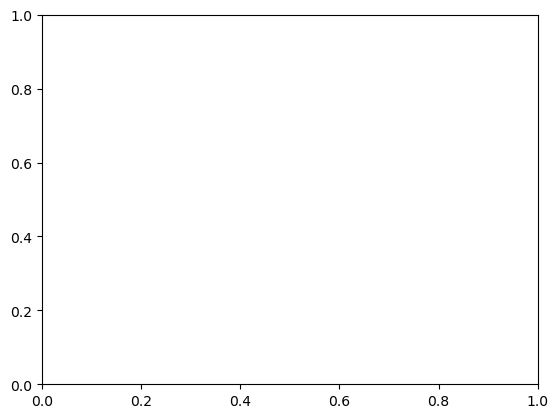

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X_test, X_test_predict)
